Author: Jerry Wu
<br>
Date: 5/10/23
<br>
Purpose: To troubleshoot the DORA2 and verify functionailty before implementation into a GUI
<br>


In [1]:
import sys
import sma_lib.DORA2 as DORA
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import sma_lib.MAP_Parameters as params
import scipy.stats as stats  # added to calculate z-score for Radius filtering


In [2]:
xmlname = "DORA2_settings"

#read in the settings in the .xml file using hazen's Parameter Class
pars = params.Parameters(xmlname+'.xml') #par is an object of type Parameters, defined in sa_library
#to access parameters, use par.parameter name. eg par.start_frame
#note these values can be manually changed: par.frameset = 200 replaces whatever was there.
print(pars.end_frame)

-1


In [3]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
# dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set" #select folder
# selected_csv = 'RecBCD_placeholder_intensity.csv' 
dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set\three_csv" #select folder

selected_csv = '00010'+'.csv' 


#Change the folder directory to be the current folder's 
os.chdir(dir_path)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path

path_OG = os.getcwd()

In [4]:
def plot_scatter(x, y):
    plt.scatter(x, y)
    plt.scatter(0, 0, marker='x', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot')
    plt.grid(True)
    
    # Set equal aspect ratio for square axes
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Set plot limits to ensure (0, 0) is always visible
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    xy_max = max(abs(xmin), abs(xmax), abs(ymin), abs(ymax))
    plt.xlim(-xy_max, xy_max)
    plt.ylim(-xy_max, xy_max)
    
    plt.show()

[INFO] CSV Loaded: 00010.csv
   index  Time (ms)  X position  Y position  Intensity  \
0      0        0.0   95.602203  170.172241     3986.0   
1      1       20.0   95.583717  170.247177     4371.0   
2      2       40.0   95.225861  170.522247     4453.0   
3      3       60.0   94.813087  170.415649     4365.0   
4      4       80.0   95.112320  170.542053     4231.0   

   3.751662292480468750e+02  1.657102394104003906e+01  \
0                447.161163                 13.621863   
1                442.965546                 12.130525   
2                458.491547                 19.451971   
3                475.491333                 17.234375   
4                464.691071                 14.343690   

   2.263989257812500000e+01  
0                 32.826725  
1                 36.516602  
2                 23.570440  
3                 27.589706  
4                 32.396896  
[INFO] Number of Invalid Readings Removed: 6


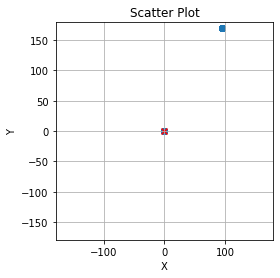

[INFO] Number of readings below the minimum intensity removed: 8
[INFO] Number of readings above the maxmimum intensity removed: 0


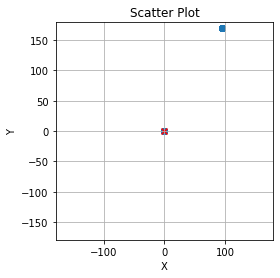

[INFO] From center_hist_max, the center is [94.57226124572753, 169.91365141296387]


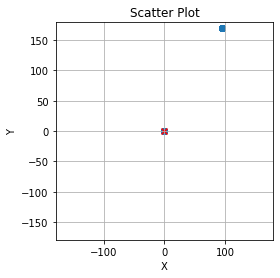

[INFO] Data has been centered around 94.57226124572753, 169.91365141296387


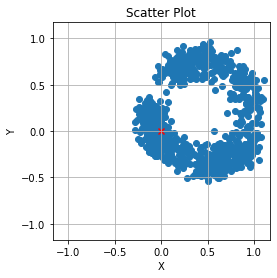

[INFO] Angle calculations have been calculated
[INFO] Data has been processed: none


,index,Time (ms),X position,Y position,Intensity,3.751662292480468750e+02,1.657102394104003906e+01,2.263989257812500000e+01,err_invalid_reading,err_intensity_filter_low,err_intensity_filter_high,X displacement (pixel),Y displacement (pixel),Radius (pixel),z-score Rad,Angle,Delta Angle,Continuous Angle
607,607,12140.0,0.0,0.0,186.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,608,12160.0,0.0,0.0,113.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,609,12180.0,0.0,0.0,-27.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,610,12200.0,0.0,0.0,-41.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,611,12220.0,0.0,0.0,-21.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,612,12240.0,0.0,0.0,51.0,0.0,0.0,0.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data = DORA.load_csv(selected_csv,dir_path)

# plot_scatter(raw_data.X_position, raw_data.Y_position)
data = raw_data.copy() # Copy data so raw data remains intact
DORA.remove_invalid_readings(data)
plot_scatter(data["X position"], data["Y position"])
DORA.remove_nopass_intensity_filter(data, min_intensity= 1300, max_intensity=None) #!! Change
plot_scatter(data["X position"], data["Y position"])
center, radius_estimate = DORA.find_center(data)
plot_scatter(data["X position"], data["Y position"])
data["X displacement (pixel)"], data["Y displacement (pixel)"] = DORA.generate_centered_data(data, center)
plot_scatter(data["X displacement (pixel)"], data["Y displacement (pixel)"])
data['Radius (pixel)'] = DORA.calculate_radius(data)
data['z-score Rad'] = DORA.calculate_rad_zscore(data)
data["Angle"], data["Delta Angle"], data["Continuous Angle"] = DORA.calculate_angle(data)
down_sampled_df = DORA.downsample(data.dropna())

data[data.err_invalid_reading]


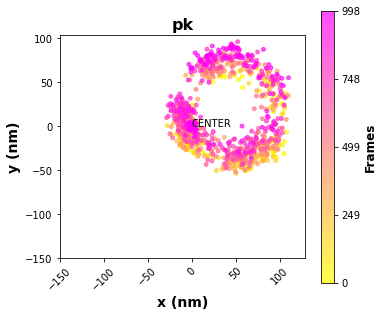

In [7]:
fig_2D, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(data, fig = fig_2D)


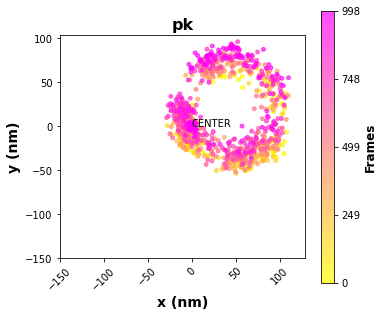

In [8]:
fig_2D_1, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(down_sampled_df, fig = fig_2D_1)

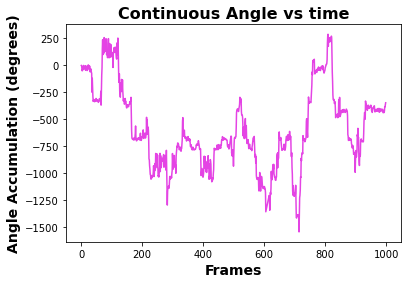

In [9]:
fig_avt, ax_avt = plt.subplots(1,1)
DORA.plot_angular_continuous(down_sampled_df, fig = fig_avt)


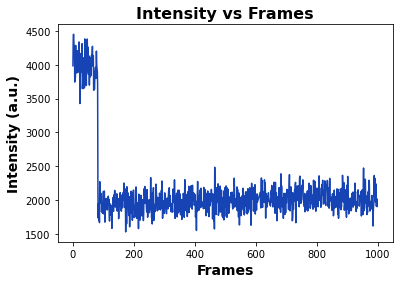

In [10]:
fig_intensity, ax_intensity = plt.subplots(1,1)

DORA.plot_intensity_time(down_sampled_df, fig= fig_intensity)